In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from FYP_processing2 import reLabelOne, reLabelTwo
from collections import Counter
from keras.utils.np_utils import to_categorical

2022-11-20 22:23:28.125462: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
datasetOneImages, datasetOneLabels = np.load('/Users/sumitkhare/datasetOneNEW.npy', allow_pickle=True)
datasetTwoImages, datasetTwoLabels = np.load('/Users/sumitkhare/datasetTwoNEW.npy', allow_pickle=True)

In [3]:
x_data = np.concatenate((datasetOneImages, datasetTwoImages))

In [4]:
x_data.shape

(11996,)

In [5]:
x_data
new_arr = []

In [6]:
shapes = []
for i in x_data:
    new_arr.append(i)
x_data = np.asarray(new_arr)

In [7]:
labelsOne = reLabelOne(datasetOneLabels)
labelsTwo = reLabelTwo(datasetTwoLabels)
y_data_int = np.concatenate((labelsOne, labelsTwo))
y_data_int.shape

(11996,)

In [8]:
Counter(y_data_int)

Counter({0: 3052, 1: 3060, 3: 3514, 2: 2370})

In [9]:
y_data = to_categorical(y_data_int)
y_data.shape

(11996, 4)

Shape of the training image array: 
 
(11996, 256, 256, 1)
 
 Some Examples: 



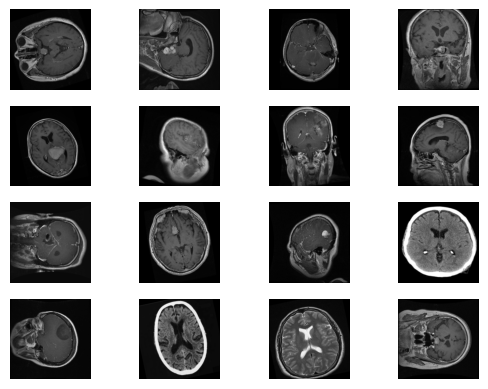

In [10]:
print("Shape of the training image array: \n \n" + str(x_data.shape) + "\n \n Some Examples: \n")

for i in range(0,16):
    x = random.randint(0,len(x_data))
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(x_data[x].astype(np.float32), cmap='gray')
    plt.axis("off")

In [11]:
x_data, y_data = shuffle(x_data, y_data)

In [12]:
x_data.max()

11309.0

In [13]:
training_split = round(len(x_data) * 0.9)

x_data /= 255

training_x = x_data[:training_split]
testing_x = x_data[training_split:]

training_y = y_data[:training_split]
testing_y = y_data[training_split:]

print(f'Training Images: {len(training_x)} \nTraining Labels: {len(training_y)} \nTesting Images: {len(testing_x)} \nTesting Labels: {len(testing_y)}')

Training Images: 10796 
Training Labels: 10796 
Testing Images: 1200 
Testing Labels: 1200


In [14]:
np.save('/Users/sumitkhare/training_x.npy', training_x)
np.save('/Users/sumitkhare/training_y.npy', training_y)

np.save('/Users/sumitkhare/testing_x.npy', testing_x)
np.save('/Users/sumitkhare/testing_y.npy', testing_y)

In [15]:
training_x = np.load('/Users/sumitkhare/training_x.npy', allow_pickle=True)
training_y = np.load('/Users/sumitkhare/training_y.npy', allow_pickle=True)
testing_x = np.load('/Users/sumitkhare/testing_x.npy', allow_pickle=True)
testing_y = np.load('/Users/sumitkhare/testing_y.npy', allow_pickle=True)

In [16]:
test_labels_dist = np.argmax(testing_y, axis=1)
training_labels_dist = np.argmax(training_y, axis=1)

In [17]:
print(f'{Counter(test_labels_dist)} --- {Counter(training_labels_dist)}')

Counter({3: 367, 0: 307, 1: 271, 2: 255}) --- Counter({3: 3147, 1: 2789, 0: 2745, 2: 2115})
